## K- Means   --- Clustering patterns of credit limit 

Download this dataset from Kaggle https://www.kaggle.com/arjunbhasin2013/ccdata/downloads/ccdata.zip/1Links  and use the K-Means Clustering algorithm to explore patterns in the dataset. Choose a few features (2~4) of the dataset to compare (for example, what do the clustering patterns of credit limit vs balance look like?, etc.) and feel free to try out different numbers of clusters. Use visualization if needed to identify trends in this data.

In [1]:
from sklearn.cluster import KMeans  #algorithm in sklearn library to do k-means clustering

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('CC_GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [10]:
df2 = df[['BALANCE','PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS']]

In [11]:
df2.describe()

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS
count,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000
mean,1564.474828,1003.204834,978.871112,4494.449450,1733.143852
std,2081.531879,2136.634782,2097.163877,3638.815725,2895.063757
min,0.000000,0.000000,0.000000,50.000000,0.000000
25%,128.281915,39.635000,0.000000,1600.000000,383.276166
50%,873.385231,361.280000,0.000000,3000.000000,856.901546
75%,2054.140036,1110.130000,1113.821139,6500.000000,1901.134317
max,19043.138560,49039.570000,47137.211760,30000.000000,50721.483360


In [35]:
df2['klabels'] = kmeans.labels_

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
df2.isnull().sum()

BALANCE         0
PURCHASES       0
CASH_ADVANCE    0
CREDIT_LIMIT    0
PAYMENTS        0
klabels         0
dtype: int64

In [18]:
df2.dropna(axis = 0, inplace = True) 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
df2.isnull().sum()

BALANCE         0
PURCHASES       0
CASH_ADVANCE    0
CREDIT_LIMIT    0
PAYMENTS        0
dtype: int64

In [20]:
#make a dataframe called X to hold the predictive features
X = df2.drop('CASH_ADVANCE', axis =1)
X.head()

,BALANCE,PURCHASES,CREDIT_LIMIT,PAYMENTS
0,40.900749,95.40,1000.0,201.802084
1,3202.467416,0.00,7000.0,4103.032597
2,2495.148862,773.17,7500.0,622.066742
3,1666.670542,1499.00,7500.0,0.000000
4,817.714335,16.00,1200.0,678.334763


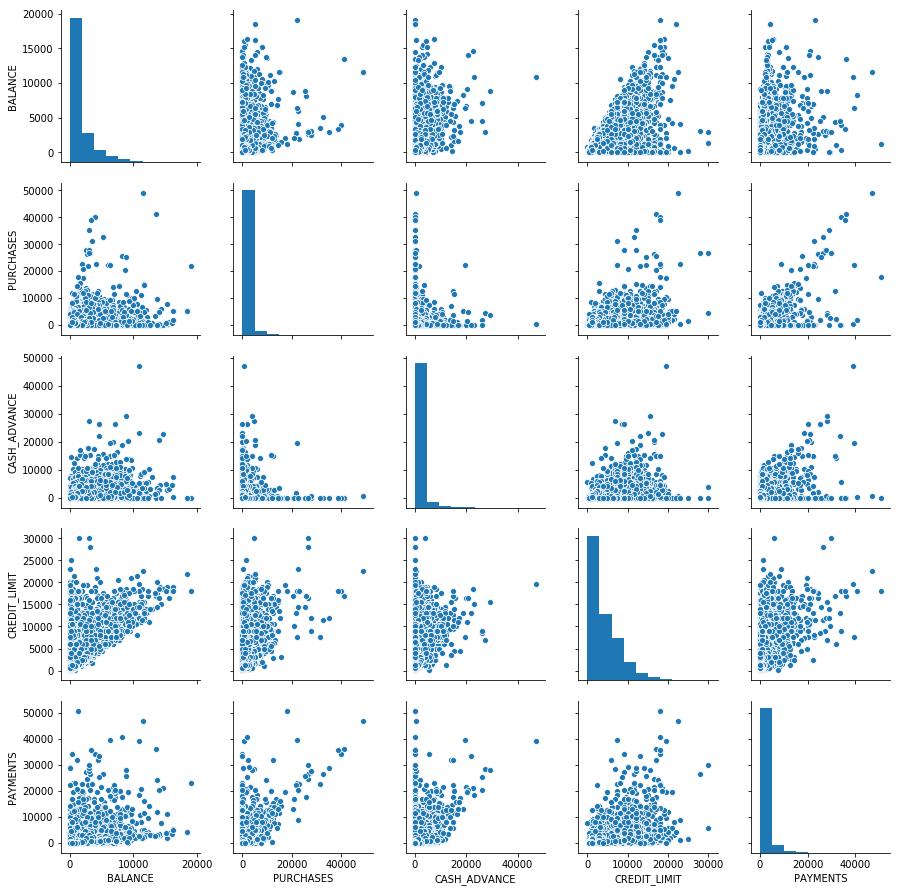

In [21]:
sns.pairplot(df2, kind="scatter", palette="husl")
plt.show()

In [22]:
#initialize k-means function
#set number of clusters to categorize = 3
kmeans = KMeans(n_clusters=3)

#the model will learn which data points seem similar
#calculates centroids
#classfies data points in clusters based on distance to centroids
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
#data point coordinates for centroids of each cluster
#index 0 is blue cluster
#index 1 is yellow cluster
#index 2 is purple cluster
#index 3 is red cluster
print(kmeans.cluster_centers_)

[[  885.5429282    591.93602785  2638.47720794  1009.12363511]
 [ 3180.58761372  1574.79703428  8950.07510045  2727.20703519]
 [ 4716.45806891 10165.03345588 12408.45588235 18078.98476321]]


Text(0, 0.5, 'PURCHASEs')

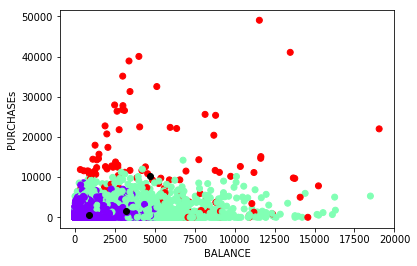

In [54]:
#scatterplot of purchase vs Balance
#predicted cluster group with k-means calculated centroids

#clusters of original features based on original category
plt.scatter(df2['BALANCE'], df2['PURCHASES'], c=df2['klabels'],  cmap='rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')

plt.xlabel('BALANCE')
plt.ylabel('PURCHASEs')

Text(0, 0.5, 'CREDIT_LIMITS')

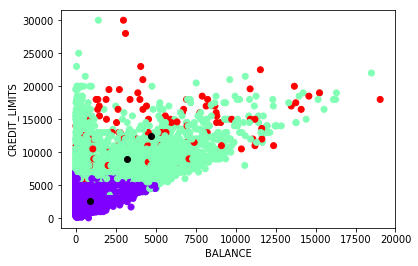

In [56]:
#scatterplot of Credit_limits vs Balanace  
#predicted cluster group with k-means calculated centroids

#clusters of original features based on original category
plt.scatter(df2['BALANCE'], df2['CREDIT_LIMIT'], c=df2['klabels'],  cmap='rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,2], c='black')

plt.xlabel('BALANCE')
plt.ylabel('CREDIT_LIMITS')

Text(0, 0.5, 'PAYMENTS')

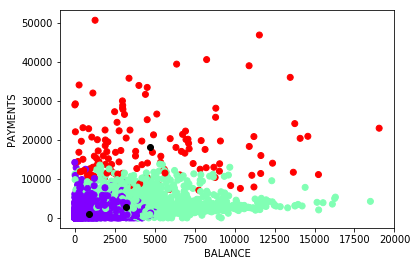

In [58]:
#scatterplot of Payements vs Balance 
#predicted cluster group with k-means calculated centroids

#clusters of original features based on original category
plt.scatter(df2['BALANCE'], df2['PAYMENTS'], c=df2['klabels'],  cmap='rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,3], c='black')

plt.xlabel('BALANCE')
plt.ylabel('PAYMENTS')

Text(0, 0.5, 'CREDIT_LIMITS')

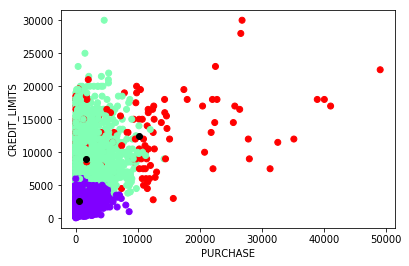

In [61]:
#scatterplot of Credit_Limits vs Purchase
#predicted cluster group with k-means calculated centroids

#clusters of original features based on original category
plt.scatter(df2['PURCHASES'], df2['CREDIT_LIMIT'], c=df2['klabels'],  cmap='rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], c='black')

plt.xlabel('PURCHASE')
plt.ylabel('CREDIT_LIMITS')

Text(0, 0.5, 'PAYMENTS')

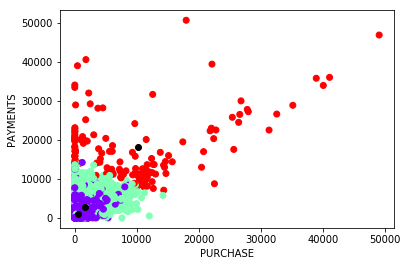

In [62]:
#scatterplot of Payments vs Purchase
#predicted cluster group with k-means calculated centroids

#clusters of original features based on original category
plt.scatter(df2['PURCHASES'], df2['PAYMENTS'], c=df2['klabels'],  cmap='rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,3], c='black')

plt.xlabel('PURCHASE')
plt.ylabel('PAYMENTS')

Text(0, 0.5, 'PAYMENTS')

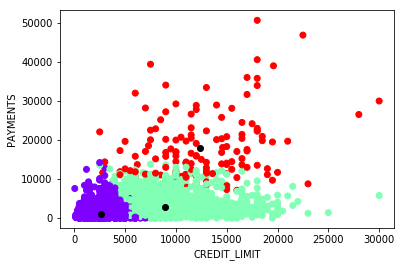

In [63]:
#scatterplot of Payements _ Credit_limits 
#predicted cluster group with k-means calculated centroids

#clusters of original features based on original category
plt.scatter(df2['CREDIT_LIMIT'], df2['PAYMENTS'], c=df2['klabels'],  cmap='rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3], c='black')

plt.xlabel('CREDIT_LIMIT')
plt.ylabel('PAYMENTS')

In [66]:
#new credit data points 
#Balance = 1564.4, PURCHASES=92,CREDIT_LIMIT = 5000 ,PAYMENTS = 1800 

point = [1510, 92, 5000,1800]

#predict category of new data point
#model thinks new data point belongs to cluster (0)
print(kmeans.predict([point]))

[0]
